In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from archetypal import settings
from utils.constants import *
from shoeboxer.shoebox_config import ShoeboxConfiguration
from shoeboxer.builder import template_dict, ShoeBox
import matplotlib.pyplot as plt

c:\Users\zoele\anaconda3\envs\ml-for-bem\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
c:\Users\zoele\anaconda3\envs\ml-for-bem\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package energy-pandas is out of date. Your version is 0.3.3, the latest is 0.3.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
settings.energyplus_location = Path("C:\EnergyPlusV22-2-0")
settings.ep_version = "22.2.0"

In [3]:
schedules = np.load("./data/schedules.npy")
schedules.shape

(16, 3, 8760)

In [4]:
epw = Path(
    "./data/epws/city_epws_indexed/cityidx_0001_USA_NY-New York Central Prk Obs Belv.725033_TMY3.epw"
)
out_dir = Path("./shoeboxer/cache")
scheds = schedules[1]
d = template_dict(scheds)

In [5]:
shoebox_config = ShoeboxConfiguration()
shoebox_config.width = 3
shoebox_config.height = 4
shoebox_config.perim_depth = 5
shoebox_config.core_depth = 4
shoebox_config.adiabatic_partition_flag = 1
shoebox_config.roof_2_footprint = 0.5
shoebox_config.ground_2_footprint = 0.5
shoebox_config.wwr = 0.2
shoebox_config.orientation = 0
shoebox_config.shading_vect = np.zeros(SHADING_DIV_SIZE)
# shoebox_config.shading_vect = np.random.random(SHADING_DIV_SIZE) * np.pi / 3

### Test out sensitivity to adiabatic partition
Non-adiabatic partition with increasing core depth vs adiabatic partition with increasing core depth


In [12]:
n = 10
core_depths = np.linspace(start=2, stop=30, num=n)
results = np.zeros((2, n, 4))
for flag in [0, 1]:
    for i, core_depth in enumerate(core_depths):
        shoebox_config.core_depth = core_depth
        shoebox_config.adiabatic_partition_flag = flag
        sb = ShoeBox(
            name=f"test_shoebox_partition_{flag}_core_{str(round(core_depth, 2)).replace('.', '')}",
            shoebox_config=shoebox_config,
            epw=epw,
            output_directory=out_dir,
            template_dict=d,
            change_summary=False,
            verbose=False
        )
        idf = sb.idf(run_simulation=False)
        hourly, monthly = sb.simulate(idf=idf)
        annual = (monthly.sum() * JOULES_TO_KWH)['System']
        annual["CORE IDEAL LOADS AIR"] = annual["CORE IDEAL LOADS AIR"] / (shoebox_config.width * core_depth)
        annual["PERIMETER IDEAL LOADS AIR"] = annual["PERIMETER IDEAL LOADS AIR"] / (shoebox_config.width * shoebox_config.perim_depth)
        print(annual)
        results[flag, i, :] = annual.values

INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 2.0
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_0_core_20.epjson
INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:11
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.10sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 5.111111111111111
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:

KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    23.657470
                           Zone Ideal Loads Supply Air Total Cooling Energy    16.262126
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    27.595568
                           Zone Ideal Loads Supply Air Total Cooling Energy    24.101362
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:11
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.10sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 8.222222222222221
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_0_core_822.epjson


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    27.285856
                           Zone Ideal Loads Supply Air Total Cooling Energy    12.101053
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    28.257238
                           Zone Ideal Loads Supply Air Total Cooling Energy    23.561781
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:11
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.09sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 11.333333333333334
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_0_core_1133.epjson


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    28.704911
                           Zone Ideal Loads Supply Air Total Cooling Energy    10.728809
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    28.574435
                           Zone Ideal Loads Supply Air Total Cooling Energy    23.276445
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:11
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.10sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 14.444444444444445
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_0_core_1444.epjson


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    29.506222
                           Zone Ideal Loads Supply Air Total Cooling Energy     9.993992
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    28.764758
                           Zone Ideal Loads Supply Air Total Cooling Energy    23.105121
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:11
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.10sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 17.555555555555557
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_0_core_1756.epjson


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    30.021592
                           Zone Ideal Loads Supply Air Total Cooling Energy     9.553229
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    28.883750
                           Zone Ideal Loads Supply Air Total Cooling Energy    22.991177
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:11
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.10sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 20.666666666666668
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    30.385752
                           Zone Ideal Loads Supply Air Total Cooling Energy     9.245118
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    28.964167
                           Zone Ideal Loads Supply Air Total Cooling Energy    22.904212
dtype: float64


INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_0_core_2067.epjson
INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:11
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.09sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 23.77777777777778
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_0_core_2378.epjson


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    30.659511
                           Zone Ideal Loads Supply Air Total Cooling Energy     9.007055
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    29.021446
                           Zone Ideal Loads Supply Air Total Cooling Energy    22.840068
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:11
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.09sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 26.88888888888889
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_0_core_2689.epjson


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    30.871097
                           Zone Ideal Loads Supply Air Total Cooling Energy     8.834811
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    29.065004
                           Zone Ideal Loads Supply Air Total Cooling Energy    22.789952
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:11
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.09sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 30.0
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_0_core_300.epjson


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    31.038367
                           Zone Ideal Loads Supply Air Total Cooling Energy     8.706328
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    29.099413
                           Zone Ideal Loads Supply Air Total Cooling Energy    22.750668
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:11
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.09sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 2.0
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_1_core_20.epjson


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    31.173691
                           Zone Ideal Loads Supply Air Total Cooling Energy     8.600142
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    29.127399
                           Zone Ideal Loads Supply Air Total Cooling Energy    22.715893
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:11
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.09sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 5.111111111111111
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_1_core_511.epjson


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    32.286062
                           Zone Ideal Loads Supply Air Total Cooling Energy     7.466729
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    25.510735
                           Zone Ideal Loads Supply Air Total Cooling Energy    26.726088
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:11
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.09sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 8.222222222222221
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_1_core_822.epjson


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    32.400887
                           Zone Ideal Loads Supply Air Total Cooling Energy     7.551043
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    25.510686
                           Zone Ideal Loads Supply Air Total Cooling Energy    26.726065
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:12
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.09sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 11.333333333333334
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_1_core_1133.epjson


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    32.437074
                           Zone Ideal Loads Supply Air Total Cooling Energy     7.573313
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    25.510663
                           Zone Ideal Loads Supply Air Total Cooling Energy    26.726067
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:12
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.09sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 14.444444444444445
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_1_core_1444.epjson


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    32.465448
                           Zone Ideal Loads Supply Air Total Cooling Energy     7.582017
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    25.525612
                           Zone Ideal Loads Supply Air Total Cooling Energy    26.726066
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:12
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.09sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 17.555555555555557
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_1_core_1756.epjson


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    32.478271
                           Zone Ideal Loads Supply Air Total Cooling Energy     7.587207
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    25.528365
                           Zone Ideal Loads Supply Air Total Cooling Energy    26.726064
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:12
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.10sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 20.666666666666668
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_1_core_2067.epjson


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    32.484893
                           Zone Ideal Loads Supply Air Total Cooling Energy     7.590531
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    25.528370
                           Zone Ideal Loads Supply Air Total Cooling Energy    26.726065
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:12
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.09sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 23.77777777777778
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_1_core_2378.epjson


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    32.489624
                           Zone Ideal Loads Supply Air Total Cooling Energy     7.593093
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    25.528372
                           Zone Ideal Loads Supply Air Total Cooling Energy    26.726070
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:12
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.10sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 26.88888888888889
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_1_core_2689.epjson


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    32.493158
                           Zone Ideal Loads Supply Air Total Cooling Energy     7.594784
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    25.528374
                           Zone Ideal Loads Supply Air Total Cooling Energy    26.726073
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:12
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.11sec
INFO:ShoeBox:Command executed successfully.
INFO:shoeboxer.geometry_utils:New perimeter depth: 5
INFO:shoeboxer.geometry_utils:New core depth: 30.0
INFO:shoeboxer.geometry_utils:Shifting core origin to perimeter edge; moving 0 m in y axis
INFO:shoeboxer.geometry_utils:Updating adiabatic surfaces.
INFO:shoeboxer.geometry_utils:Maximum shading point is 0.0
INFO:shoeboxer.geometry_utils:Placing shading around center point [1.5 0. ]
INFO:ShoeBox:Building idf for shoeboxer\cache\test_shoebox_partition_1_core_300.epjson


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    32.495895
                           Zone Ideal Loads Supply Air Total Cooling Energy     7.596080
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    25.528375
                           Zone Ideal Loads Supply Air Total Cooling Energy    26.726075
dtype: float64


INFO:ShoeBox:EnergyPlus Starting
INFO:ShoeBox:EnergyPlus, Version 22.2.0-c249759bad, YMD=2023.11.06 23:12
INFO:ShoeBox:Converted input file format. Exiting.
INFO:ShoeBox:EnergyPlus Run Time=00hr 00min  0.09sec
INFO:ShoeBox:Command executed successfully.


KeyValue                   Name                                            
CORE IDEAL LOADS AIR       Zone Ideal Loads Supply Air Total Heating Energy    32.498082
                           Zone Ideal Loads Supply Air Total Cooling Energy     7.597101
PERIMETER IDEAL LOADS AIR  Zone Ideal Loads Supply Air Total Heating Energy    25.528376
                           Zone Ideal Loads Supply Air Total Cooling Energy    26.726081
dtype: float64


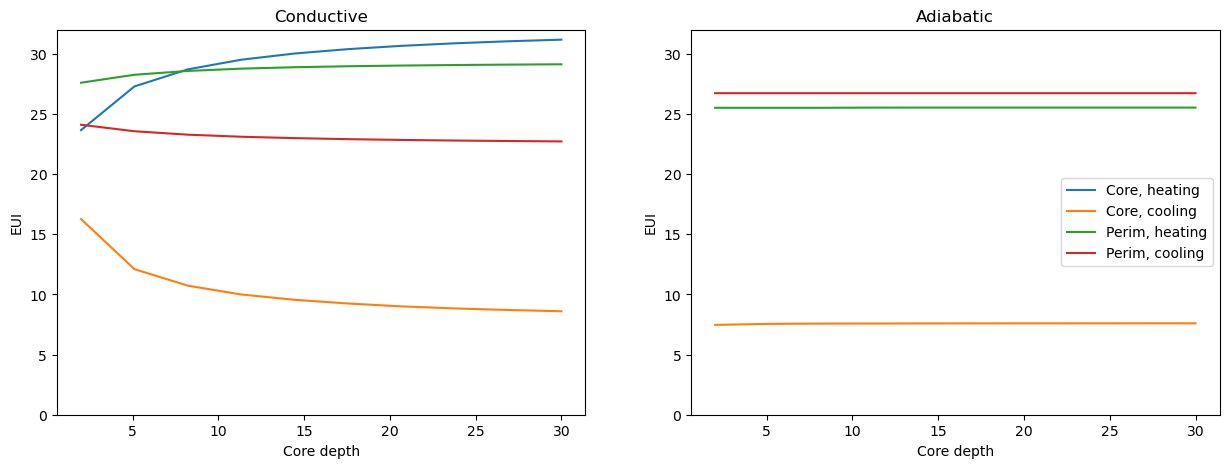

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
for i, flag in enumerate(["Conductive", "Adiabatic"]):
    ax[i].set_title(flag)
    ax[i].set_xlabel("Core depth")
    ax[i].set_ylabel("EUI")
    for j, res in enumerate(["Core, heating", "Core, cooling", "Perim, heating", "Perim, cooling"]):
        ax[i].plot(core_depths, results[i, :, j], label=res)
ax[1].legend()
ax[0].set_ylim(0, round(results.max()))
ax[1].set_ylim(0, round(results.max()))
fig.show()